In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import pickle

from src.network_simulator import PoissonNetwork
from src.variational_bayes import VariationalBayes

In [44]:
num_nodes = 500; num_groups = 2; T_max = 10
group_sizes = np.array([200, 300])
group_sizes_prime = group_sizes
# lam_matrix = np.array([[2, 0.2, 3.0],
#                        [0.3, 8.0, 6.0],
#                        [2.0, 7.0, 25.0]])
# num_nodes = 1000; num_groups = 4; T_max = 10
# group_sizes = np.array([200, 300, 300, 200])
# lam_matrix = np.array([[2, 0.2, 3.0, 15],
#                        [0.3, 8.0, 6.0, 12],
#                        [2.0, 7.0, 25.0, 14],
#                        [13, 11, 12, 100]])

# group_sizes = [np.array([300, 200]),
#                np.array([500, 0]),
#                np.array([200, 300])]

lam_matrix = np.array([[2, 1.0],
                       [0.3, 8.0]])
rho_matrix = np.array([[0.01, 0.01],
                       [0.01, 0.01]])
rate_matrices = [
    lam_matrix,
    np.array([[5, 1.0],
              [0.3, 8.0]])]

PN = PoissonNetwork(num_nodes, num_groups, T_max,
                    lam_matrix=lam_matrix,
                    rho_matrix=rho_matrix)
sampled_network, groups_in_regions = (
    PN.sample_network(group_sizes=group_sizes,
                      group_num_change=False,
                      mem_change=True,
                      mem_change_times=np.tile([2], 50),
                      mem_change_nodes=np.arange(50))
)
adj_mat = PN.adjacency_matrix

In [56]:
adj_mat = np.ones((num_nodes, num_nodes))
np.fill_diagonal(adj_mat, 0)

int_length = 0.1; 
delta_pi = 1; delta_rho = 0.1; delta_lam = 0.1; n_cavi = 2

VB = VariationalBayes(sampled_network=sampled_network, num_groups=2, 
                      num_nodes=num_nodes, alpha_0=1., beta_0=1.,
                      sigma_0=0.5, eta_0=1., zeta_0=1., gamma_0=np.array([0.99, 1.01]),
                      infer_graph_bool=True,
                      T_max=T_max, int_length=int_length)
VB.run_full_var_bayes(delta_pi=delta_pi,
                      delta_rho=delta_rho,
                      delta_lam=delta_lam,
                      n_cavi=n_cavi,
                      N_runs_ADAM=5)

VB.tau_store[-1,:,:].mean(axis=0)

...Iteration: 1 of 100...
...Iteration: 2 of 100...
...Iteration: 3 of 100...
...Iteration: 4 of 100...
...Iteration: 5 of 100...
...Iteration: 6 of 100...
...Iteration: 7 of 100...
...Iteration: 8 of 100...
...Iteration: 9 of 100...
...Iteration: 10 of 100...
...Iteration: 11 of 100...
...Iteration: 12 of 100...
...Iteration: 13 of 100...
...Iteration: 14 of 100...
...Iteration: 15 of 100...
...Iteration: 16 of 100...
...Iteration: 17 of 100...
...Iteration: 18 of 100...
...Iteration: 19 of 100...
...Iteration: 20 of 100...
...Iteration: 21 of 100...
...Iteration: 22 of 100...
...Iteration: 23 of 100...
...Iteration: 24 of 100...
...Iteration: 25 of 100...
...Iteration: 26 of 100...
...Iteration: 27 of 100...
...Iteration: 28 of 100...
...Iteration: 29 of 100...
...Iteration: 30 of 100...
...Iteration: 31 of 100...
...Iteration: 32 of 100...
...Iteration: 33 of 100...
...Iteration: 34 of 100...
...Iteration: 35 of 100...
...Iteration: 36 of 100...
...Iteration: 37 of 100...
...Iterati

array([0.67027025, 0.32972975])

In [57]:
VB.eta / (VB.eta + VB.zeta)

array([[0.01031724, 0.00916326],
       [0.01007126, 0.00988415]])

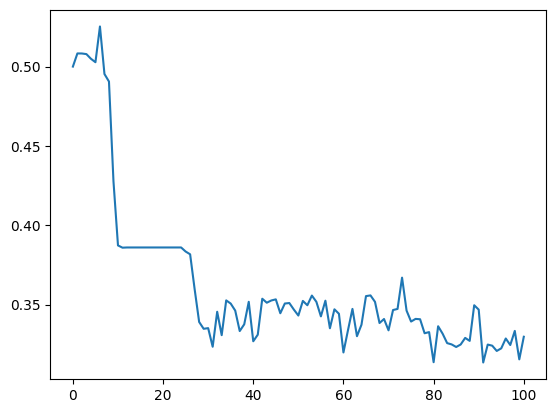

In [60]:
plt.plot(np.arange(101), VB.tau_store.mean(axis=1)[:,1])

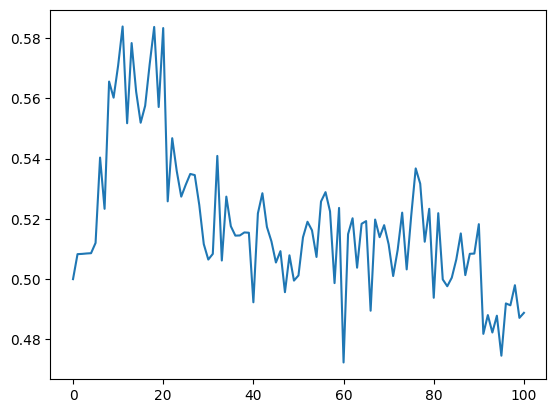

In [53]:
plt.plot(np.arange(101), VB.tau_store.mean(axis=1)[:,1])

ValueError: x and y must have same first dimension, but have shapes (41,) and (101,)

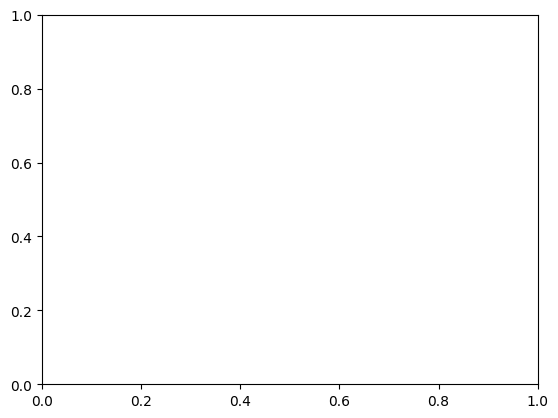

In [37]:
for k in range(2):
    for m in range(2):
        plt.plot(np.arange(41), 
                 VB.alpha_store[:,k,m] / VB.beta_store[:,k,m])

In [6]:
VB.eta / (VB.eta + VB.zeta)

0.20243226873521647

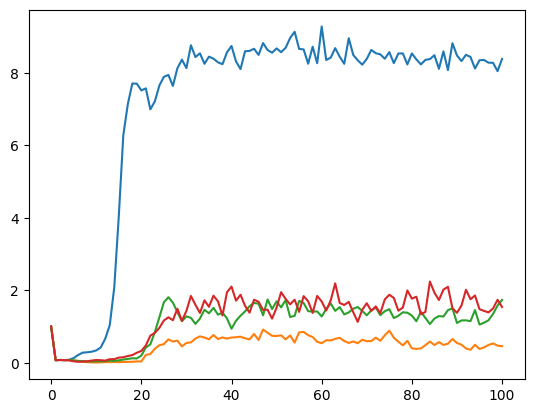

In [59]:
for k in range(2):
    for m in range(2):
        plt.plot(np.arange(101), VB.alpha_store[:,k,m] / VB.beta_store[:,k,m])

In [ ]:
VB.tau_store

array([[[5.00000000e-001, 5.00000000e-001],
        [5.00000000e-001, 5.00000000e-001],
        [5.00000000e-001, 5.00000000e-001],
        ...,
        [5.00000000e-001, 5.00000000e-001],
        [5.00000000e-001, 5.00000000e-001],
        [5.00000000e-001, 5.00000000e-001]],

       [[9.83340781e-021, 1.00000000e+000],
        [3.70310666e-018, 1.00000000e+000],
        [1.45620782e-017, 1.00000000e+000],
        ...,
        [1.00000000e+000, 1.04552669e-037],
        [1.00000000e+000, 1.98976096e-065],
        [1.00000000e+000, 3.21652626e-038]],

       [[6.56160190e-020, 1.00000000e+000],
        [3.65390939e-017, 1.00000000e+000],
        [1.34687831e-020, 1.00000000e+000],
        ...,
        [1.00000000e+000, 2.85799950e-040],
        [1.00000000e+000, 2.52416198e-068],
        [1.00000000e+000, 3.12991599e-051]],

       ...,

       [[5.64027243e-124, 1.00000000e+000],
        [2.18891021e-113, 1.00000000e+000],
        [2.80185896e-132, 1.00000000e+000],
        ...,
     

In [ ]:
int_length = 1; 
delta_pi = 1; delta_rho = 0.1; delta_lam = 0.1; n_cavi = 2

VB = VariationalBayes(sampled_network=sampled_network, num_groups=2, 
                      adj_mat=np.ones((num_nodes, num_nodes)),
                      num_nodes=num_nodes, alpha_0=1., beta_0=1.,
                      sigma_0=0.5, eta_0=1., zeta_0=1., gamma_0=np.array([0.99, 1.01]),
                      infer_graph_bool=False,
                      T_max=T_max, int_length=int_length)
VB.run_full_var_bayes(delta_pi=delta_pi,
                      delta_rho=delta_rho,
                      delta_lam=delta_lam,
                      n_cavi=n_cavi)

VB.tau_store[-1,:,:].mean(axis=0)

In [ ]:
# int_length = 0.1; burn_in = 1

# delta_pi = 1; delta_rho = 0.1; delta_lam = 1; n_cavi = 3
# sigma_0 = np.ones((num_nodes, num_nodes)) * 0.5

# VB = VariationalBayes(sampled_network=sampled_network, 
#                       num_nodes=num_nodes, alpha_0=1, beta_0=1, eta_0=1, 
#                       zeta_0=1, gamma_0 = np.array([0.99, 1.01]), 
#                       sigma_0=sigma_0, infer_graph_bool=True,
#                       num_groups=2, T_max=T_max, int_length=int_length)
# VB.run_full_var_bayes(delta_pi=delta_pi,
#                       delta_rho=delta_rho,
#                       delta_lam=delta_lam,
#                       n_cavi=n_cavi)

# VB.tau_store[-1,:,:].mean(axis=0)

int_length = 0.1; burn_in = 1

delta_pi = 1; delta_rho = 1; delta_lam = 0.1; n_cavi = 3

VB = VariationalBayes(sampled_network=sampled_network, 
                      num_nodes=num_nodes, alpha_0=1, 
                      beta_0=1, gamma_0 = np.array([0.99, 1.01]), 
                      adj_mat=adj_mat, num_groups=2, T_max=T_max, 
                      int_length=int_length)
VB.run_full_var_bayes(delta_pi=delta_pi,
                      delta_rho=delta_rho,
                      delta_lam=delta_lam,
                      n_cavi=n_cavi)

VB.tau_store[-1,:,:].mean(axis=0)

In [ ]:
from scipy.special import gammaln
from scipy.stats import median_abs_deviation, dirichlet, bernoulli
from scipy.stats import beta as beta_
from scipy.stats import gamma as gamma_
import time

num_nodes = 250; num_groups = 2
update_time = 5
gamma = np.random.uniform(0, 1, (num_groups,))
eta = np.random.uniform(0, 1, (num_groups, num_groups))
zeta = np.random.uniform(0, 1, (num_groups, num_groups))
alpha = np.random.uniform(0, 1, (num_groups, num_groups))
beta = np.random.uniform(0, 1, (num_groups, num_groups))
sigma = np.random.uniform(0, 1, (num_nodes, num_nodes))
tau = np.random.uniform(0, 1, (num_nodes, num_groups))
x_val = np.random.poisson(1, (num_nodes, num_nodes))
x_bool = x_val > 0
tau_max_idx = tau.argmax(axis=1)
z_val = np.zeros((num_nodes, num_groups))
z_val[np.arange(num_nodes), tau_max_idx] = 1
a_samples = np.ones((100, num_nodes, num_nodes))
u = np.random.uniform(0, 1, (100, num_nodes, num_nodes))
u_bool = u > sigma[np.newaxis, ...]
a_samples[u_bool] = 0
a_samples[:, x_bool] = 1
lambda_val = np.random.uniform(0, 1, (num_groups, num_groups))
pi_val = np.random.uniform(0, 1, (num_groups, )) 
pi_val = pi_val / pi_val.sum()
rho_val = np.random.uniform(0, 1, (num_groups, num_groups))

def _log_joint(a, x, z, rho, lambda_, pi):
    # CHECK IF WE WANT DEPENDENCE ON FULL DATA OR JUST OBSERVATION WINDOW
    start = time.time()
    term1a = np.einsum('lij,ik,jm,ij,km -> l', a, z, z, x, np.log(lambda_),
                       optimize='optimal')
    end = time.time()
    print(f"Time taken term 1a: {end - start}")
    start = time.time()
    term1b = np.einsum('lij,ik,jm,km -> l', a, z, z, -update_time * lambda_,
                       optimize='optimal')
    end = time.time()
    print(f"Time taken term 1b: {end - start}")
    start = time.time()
    term1c = np.einsum('ik,jm,lij,km -> l', z, z, a, np.log(rho),
                       optimize='optimal')
    end = time.time()
    print(f"Time taken term 1c: {end - start}")
    start = time.time()
    term1d = np.einsum('ik,jm,lij,km -> l', z, z,(1 - a), np.log(1 - rho),
                       optimize='optimal')
    end = time.time()
    print(f"Time taken term 1d: {end - start}")
    term1 = term1a + term1b + term1c + term1d
    
    start = time.time()
    term2a = np.matmul(z, np.log(pi)).sum()
    term2b = ((gamma - 1) * np.log(pi) + gammaln(gamma)).sum()
    term2c = gammaln(np.sum(gamma))
    term2 = term2a + term2b + term2c
    end = time.time()
    print(f"Time taken term 2: {end - start}")
    
    start = time.time()
    term3 = (
        gammaln(eta + zeta) - gammaln(eta) -
        gammaln(zeta) + (eta - 1) * np.log(rho) +
        (zeta - 1) * np.log(1 - rho) + 
        alpha * np.log(beta) - gammaln(alpha) + 
        (alpha - 1) * np.log(lambda_) - beta * lambda_
    ).sum()
    end = time.time()
    print(f"Time taken term 3: {end - start}")

    return term1 + term2 + term3

start = time.time()
_log_joint(a_samples, x_val, z_val, rho_val, lambda_val, pi_val)
end = time.time()
print(f"Time: {end - start}")

Time taken term 1a: 0.6123933792114258
Time taken term 1b: 0.5506880283355713
Time taken term 1c: 0.44406771659851074
Time taken term 1d: 0.4745206832885742
Time taken term 2: 7.939338684082031e-05
Time taken term 3: 2.5033950805664062e-05
[-272505.68156963 -272853.82185149 -272584.61092709 -272034.76536862
 -272387.20810121 -272930.6491303  -272770.95109686 -272465.88639368
 -272652.69512265 -272315.48943214 -272838.40590702 -272920.58338386
 -273015.52475921 -272562.85839049 -272132.7309455  -272633.32326445
 -272533.29956724 -272958.73590152 -273339.34561194 -272867.662437
 -272998.79878859 -272362.93401824 -272866.21482444 -271758.33848559
 -272926.16079619 -272498.97722308 -272955.96428221 -272533.59335236
 -272391.18297429 -272819.86480953 -272564.81316031 -273078.06255489
 -272376.7874192  -272710.74559815 -272769.90137482 -272285.07793642
 -272469.69282268 -272804.7245767  -272417.77764177 -272212.23066544
 -273137.94829681 -272123.79189477 -272158.92852603 -272230.60200846
 -2

In [ ]:
for i in range(2):
    for j in range(2):
        plt.plot(np.arange(0, T_max + int_length, int_length), 
                 [VB.alpha_store[k,i,j]/VB.beta_store[k,i,j] for k in np.arange(0, int(T_max/int_length) + 1)])

# plt.axvline(x=5, linestyle='--', color='black', linewidth=1);
# plt.plot(np.arange(6), [2,2,2,2,2,2], linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [8] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [2] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [1] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.plot(np.arange(5, 20), [0.3] * len(np.arange(5,20)), linestyle='--', color='black', linewidth=1)
# plt.savefig("group_creation.pdf")

In [ ]:
int_length = 0.1

# sigma_init = np.random.uniform(0,1,num_nodes ** 2).reshape((num_nodes,num_nodes))
param_prior = np.array([1] * num_groups ** 2).reshape((num_groups, num_groups))

delta_pi = 1; delta_rho = 1; delta_lam = 0.1; n_cavi = 2

VB = VariationalBayes(sampled_network=sampled_network, 
                      num_nodes=num_nodes, 
                      num_groups=num_groups, 
                      alpha_0=1, 
                      beta_0=1,
                      gamma_0 = np.array([0.99, 1.01]),
                      int_length=int_length,
                      T_max=T_max,
                      adj_mat=adj_mat)
VB.run_full_var_bayes(delta_pi=delta_pi,
                      delta_rho=delta_rho,
                      delta_lam=delta_lam,
                      n_cavi=n_cavi,
                      cp_kl_lag_steps=2,
                      cp_burn_steps=5,
                      cp_stationary_steps=10,
                      cp_kl_thresh=100,
                      cp_rate_wait=0,
                      ARLO_bool=True)

VB.tau_store[-1,:,:].mean(axis=0)

In [ ]:
VB.group_changes_list

In [ ]:
rate_matrices = PN.lam_matrices
rate_mat_old = rate_matrices[0]

entry_change = np.zeros((len(rate_change_times), 2))

for cp in range(len(rate_change_times)):
    rate_mat_curr = rate_matrices[cp + 1]
    entry_change[cp,:] = np.argwhere(rate_mat_curr != rate_mat_old)
    rate_mat_old = rate_mat_curr

In [ ]:
alpha = VB.alpha_store; beta = VB.beta_store
for j in [0,1]:
    for k in [0,1]:
        plt.plot(np.arange(0, T_max, int_length),
                    [alpha[i,j,k] / beta[i,j,k] for i in np.arange(int(T_max/int_length))],
                    linewidth=2)
        plt.axhline(y=lam_matrix[j,k], linestyle='--', color='black', linewidth=1)

# g_out = 1; g_in = 0
# idx_set = np.where(np.all(entry_change == [g_out, g_in], axis=1))[0]
# for idx in idx_set:
#        plt.axvline(x=rate_change_times[idx], linestyle='--', color='black', linewidth=0.75)
# for cp in rate_change_times:
#     plt.axvline(x=cp, linestyle='--', color='black', linewidth=0.75)

# plt.ylim([0,5.5]);
plt.xlabel('Iteration');
plt.ylabel(r'$\lambda$ posterior mean');
plt.savefig('analyses/local_figures/motivating_rate_change_delta.pdf')

In [ ]:
from scipy.special import gammaln, digamma

def kl(a1, a2, b1, b2):
    """
    Parameters:
        - a1, b1: the rate and scale of the approx posterior from t-1.
        - a2, b2: the rate and scale of the approx posterior from t.
    """
    return (
            a2 * np.log(b1 / b2) - gammaln(a1) + gammaln(a2) +
            (a1 - a2) * digamma(a1) - (b1 - b2) * a1 / a2)

burn_in = 1

g_out = 0; g_in = 0

legend_labels = []
for lag in [1, 2]:
        # Plot the mean of the posteriors for lambda with iteration number
        for j in [1]:
                for k in [1]:
                        kl_vals = np.array([abs(kl(alpha[i,j,k], alpha[i - lag,j,k],
                                                beta[i,j,k], beta[i - lag,j,k]))
                                                for i in np.arange(int(burn_in/int_length), int(T_max/int_length), 1)])
                        plt.plot(np.arange(burn_in, T_max, int_length),
                                kl_vals, marker='o')

# idx_set = np.where(np.all(entry_change == [g_out, g_in], axis=1))[0]
# for idx in idx_set:
#        plt.axvline(x=rate_change_times[idx], linestyle='--', color='black', linewidth=0.75)

for cp in [1.5,2]:
       plt.axvline(x=cp, linestyle='--', color='black', linewidth=0.75)

plt.axvline([1.8], linestyle='--', color='black', linewidth=0.75)

plt.ylim([-1,150])

# idx_set = np.where(np.all(entry_change == [g_out, g_in], axis=1))[0]
# for idx in idx_set:
#        plt.axvline(x=[1.5,2][idx], linestyle='--', 
#                    color='red', linewidth=0.75)

# plt.ylim([0,800])
# plt.legend(legend_labels, title='Lag')
plt.xlabel("Update time")
plt.title("KL divergence from current iteration to previous");

In [ ]:
VB.group_changes_list

In [ ]:
np.median(kl_vals[:15]) * 25

In [ ]:
max_lag = 2
a = np.array([1,2,3,4,5,6,7,8,9,10])
a1 = a[max_lag:]; a2 = a[(max_lag - 1):-1]
kl_lag = a1 ** 2 + a2 ** 2

In [ ]:
print(a1, a2, kl_lag)

In [ ]:
a[max_lag:-1]

In [ ]:
from scipy.stats import median_abs_deviation
from scipy.special import gammaln, digamma


def kl(a1, a2, b1, b2):
    """
    Parameters:
        - a1, b1: the rate and scale of the approx posterior from t-1.
        - a2, b2: the rate and scale of the approx posterior from t.
    """
    return (
            a2 * np.log(b1 / b2) - gammaln(a1) + gammaln(a2) +
            (a1 - a2) * digamma(a1) - (b1 - b2) * a1 / b1
            )

def kl_vector(alpha, beta, lag, max_lag):
    """
    Parameters:
        - alpha, beta: numpy arrays of all inferred values
    """
    lag += 1
    alpha_1 = alpha[max_lag:]; alpha_2 = alpha[(max_lag - lag):-lag]
    beta_1 = beta[max_lag:]; beta_2 = beta[(max_lag - lag):-lag]
    kl_lag = (
        alpha_2 * np.log(beta_1 / beta_2) - 
        gammaln(alpha_1) + gammaln(alpha_2) +
        (alpha_1 - alpha_2) * digamma(alpha_1) -
        (beta_1 - beta_2) * alpha_1 / alpha_2
    )
    
    return kl_lag

# max_lag = 10
# fig, axs = plt.subplots(max_lag, 1, figsize=(8, 10))

# time = np.arange(T_max, int_length)
# for lag in range(max_lag):
#     kl_lag = kl_vector(alpha[init_burn:], beta[init_burn:], lag, max_lag)
#     axs[lag].plot(np.arange(init_burn * int_length + max_lag * int_length, T_max + int_length, int_length), 
#              kl_lag[:,1,0], marker='o')
#     axs[lag].set_xticks(np.arange(init_burn * int_length + lag * int_length, T_max + int_length, int_length))
#     axs[lag].set_xticklabels('')

# for lag in [1]:
#     # Plot the mean of the posteriors for lambda with iteration number
#     for j in [0]:
#             for k in [0]:
#                     kl_vals = np.array([abs(kl(alpha[i-lag,j,k], alpha[i,j,k],
#                                             beta[i-lag,j,k], beta[i,j,k]))
#                                             for i in np.arange(int(burn_in/int_length), int(T_max/int_length), 1)])

# time = np.arange(1, T_max, int_length)
# for i in range(2, len(kl_vals)):
#     mad_val = MAD_outlier_detector(kl_vals[:i], 100)
#     if mad_val:
#         print(time[i])
    
def MAD_KL_outlier_detector(alpha, beta, max_lag, cutoff):
    """
    The function takes data contains all points up to and including
    the current update time, assuming that the burn-in points aren't 
    included. 
    """
    ## Compute the KL-divergences off all lags up to current lag
    kl_lag_list = list()
    kl_curr_datum_list = list()
    for lag in range(1, max_lag + 1):
        alpha_1 = alpha[max_lag:]; alpha_2 = alpha[(max_lag - lag):-lag]
        beta_1 = beta[max_lag:]; beta_2 = beta[(max_lag - lag):-lag]
        kl_lag = (
            alpha_2 * np.log(beta_1 / beta_2) - 
            gammaln(alpha_1) + gammaln(alpha_2) +
            (alpha_1 - alpha_2) * digamma(alpha_1) -
            (beta_1 - beta_2) * alpha_1 / beta_1
        )
        kl_curr_datum_list.append(kl_lag[-1])
        kl_lag_list.append(kl_lag[:-1])
    kl_curr_datum = np.array(kl_curr_datum_list)
    kl_lag = np.concatenate(kl_lag_list)

    ## Compute the current MAD and the deviation of the current datum
    # Current MAD (excluding current datum)
    curr_MAD = median_abs_deviation(kl_lag)
    # Deviation of current datum (for each lag up to max_lag)
    MAD_deviation_lags = []
    for i in range(max_lag):
        MAD_deviation_lags.append(
            np.abs(kl_curr_datum[i] - np.median(kl_lag)) / curr_MAD
            )
    # Flag as a change point if all lags are greater than the cutoff
    if np.all(np.array(MAD_deviation_lags) > cutoff):
        return 1
    else: 
        return 0

init_burn = 5; max_lag = 2; cut_off = 10; B = 0.5
num_flagged = 0
for k in [0, 1]:
    for m in [0, 1]:
        previous_change_time = 0
        for i in np.arange(int(T_max/int_length)):
            if i > (init_burn + max_lag):
                cp_flag = MAD_KL_outlier_detector(
                    alpha[init_burn:i, k, m], alpha[init_burn:i, k, m], max_lag, cut_off
                    )
                if cp_flag:
                    latest_change_time = (i + init_burn) * int_length
                    if latest_change_time - previous_change_time > B:
                        print(f"{k} -> {m}: {latest_change_time}")
                        previous_change_time = latest_change_time
                        num_flagged += 1
print(f"Number flagged: {num_flagged}")


In [ ]:
rate_change_times

In [ ]:
VB.rate_changes_list

In [ ]:
rate_change_times

In [ ]:
alpha_burned / beta_burned

In [ ]:
entry_change

In [ ]:
rate_change_times

In [ ]:
PN.lam_matrices

In [ ]:
from scipy.stats import gamma

x = np.linspace(0,20,1000)
for i in [99]:
    pdf_values = gamma.pdf(x, VB.alpha_store[i][1,1], 
                                    scale=1/VB.beta_store[i][1,1])
    plt.plot(x, pdf_values)
    # pdf_values = gamma.pdf(x, VB.alpha_store[i][1,1], 
    #                                 scale=1/VB.beta_store[i][1,1])
    # plt.plot(x, pdf_values)

In [ ]:
nu_prior = np.ones((10,))
tau = np.random.random((500,10))
num_var_groups = 10

omega = tau.sum(axis=0) + 1
        
## Compute nu using vectorisaion to avoid for loops
# Create a mask to select appropriate elements tau
mask = np.triu(np.ones((num_nodes, num_var_groups), dtype=bool), k=1)

# Sum along the appropriate axes
sum_tau = np.sum(tau[:, np.newaxis, :] * mask[np.newaxis, :, :], axis=(0,1))

# Compute the final result
nu = sum_tau + nu_prior
nu

In [ ]:
import time

num_var_groups = 10
tau = np.random.random((500, 10))
nu_prior = np.ones((10,))

start = time.time() 
sum_term = np.zeros((num_nodes,))
nu = np.zeros((num_var_groups,))
for j in range(num_var_groups):
    sum_term[:] = tau[:, (j+1):].sum(axis=1) 
    nu[j] = sum_term.sum() + nu_prior[j]

end = time.time()

print(f"Time: {end - start}")

print(nu)

start = time.time()

sum_term = np.zeros((num_nodes, ))
nu = np.zeros((num_var_groups, ))
for j in range(num_var_groups):
    for i in range(num_nodes):
        sum_term[i] = tau[i,(j+1):].sum() 
    nu[j] = sum_term.sum() + nu_prior[j]

end = time.time()

print(f"Time: {end - start}")

print(nu)

In [ ]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Parameters for the gamma distribution
shape = 2
scale = 4 / shape

# Range of x values
x = np.linspace(0, 5, 1000)

power = 0.1

for i in range(5):
    shape += 200
    scale = 4 / shape
    gamma_dist = gamma(power * (shape - 1) + 1, 
                    scale=scale/power)
    pdf_values = gamma_dist.pdf(x)

    # np.savetxt(f'gamma_pdf_2_7.csv', np.column_stack([x, pdf_values]))

    # Plot the result
    plt.plot(x, pdf_values)
plt.show()


In [ ]:
from scipy.special import gammaln, digamma
import matplotlib.pyplot as plt
import numpy as np

def kl(a1, a2, b1, b2):
    """
    Parameters:
        - a1, b1: the rate and scale of the approx posterior from t-1.
        - a2, b2: the rate and scale of the approx posterior from t.
    """
    return (
            a2 * np.log(b1 / b2) - gammaln(a1) + gammaln(a2) +
            (a1 - a2) * digamma(a1) - (b1 - b2) * a1 / b1)

a = 1000; eps1 = 1; eps2 = 1
plt.plot(np.arange(1,10000,1), [kl(b, b + eps1, a, a + eps2) for b in np.arange(1,10000,1)]);

In [ ]:
num_nodes = 250; num_groups = 2; T_max = 1
# group_sizes = np.array([100, 250, 150])
# lam_matrix = np.array([[2, 0.2, 3.0],
#                        [0.3, 8.0, 6.0],
#                        [2.0, 7.0, 25.0]])
# num_nodes = 1000; num_groups = 4; T_max = 10
# group_sizes = np.array([200, 300, 300, 200])
# lam_matrix = np.array([[2, 0.2, 3.0, 15],
#                        [0.3, 8.0, 6.0, 12],
#                        [2.0, 7.0, 25.0, 14],
#                        [13, 11, 12, 100]])

group_sizes = np.array([240, 10])

lam_matrix = np.array([[2, 1.0],
                       [0.3, 8.0]])
rho_matrix = np.array([[0.9, 0.9],
                      [0.9, 0.9]])

rate_matrices = [
    lam_matrix,
    np.array([[5, 1.0],
              [0.3, 8.0]]),
    np.array([[3, 1.0],
              [0.3, 8]])]

PN = PoissonNetwork(num_nodes, num_groups, T_max, lam_matrix=lam_matrix)
sampled_network, groups_in_regions = (
    PN.sample_network(group_sizes=group_sizes)
)
adj_mat = PN.adjacency_matrix

In [ ]:
num_nodes = 250; num_groups = 2; T_max = 10

group_sizes = np.array([248, 2])

lam_matrix = np.array([[2, 1.0],
                       [0.3, 8.0]])

PN = PoissonNetwork(num_nodes, num_groups, T_max, lam_matrix=lam_matrix)
sampled_network, groups_in_regions = (
    PN.sample_network(group_sizes=group_sizes)
)
adj_mat = PN.adjacency_matrix

def compute_eff_count(update_time, num_nodes, sampled_network):
    """
    A method to compute the effective count on each edge. This is simply 
    the number of observations on an edge from update_time - int_length to
    update_time. Parameters:
        - update_time: time at which we run the update.  
    """
    eff_count = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if sampled_network[i][j] is not None:
                np_edge = np.array(
                    sampled_network[i][j]
                )
                eff_count[i,j] = (
                    len(
                        np_edge[(np_edge < update_time)]
                    )
                )
    return eff_count

eff_count = compute_eff_count(T_max, num_nodes, sampled_network)

tau = np.zeros((num_nodes, num_groups))
# tau[:group_sizes[0],0] = 1; tau[group_sizes[0]:,1] = 1
tau[0:-2,0] = 1; tau[-2:,1] = 0.15; tau[-2:,0] = 1 - tau[-2:,1]

beta = np.array([[1,1], [1,1]]); alpha = np.array([[1,1], [1,1]])
Delta = T_max; delta = 0.1
sigma = np.ones((num_nodes, num_nodes))
np.fill_diagonal(sigma, 0)

for i in range(1000):
    # delta = 1 - Delta * (tau.T @ tau)[k,m] / (beta * 500)
    alpha = delta * (alpha - 1) + (tau.T @ eff_count @ tau) + 1
    beta = (delta * beta + Delta * tau.T @ sigma @ tau)
    # print(f"alpha: {np.round(alpha,3)}, beta: {np.round(beta,3)}, mean: {np.round(alpha/beta,3)}")
print(f"""
      lam00: {round(alpha[0,0]/beta[0,0], 1)}, 
      lam01: {round(alpha[0,1]/beta[0,1], 1)},
      lam10: {round(alpha[1,0]/beta[1,0], 1)},
      lam11: {round(alpha[1,1]/beta[1,1], 1)}
""")


In [ ]:
wh = np.array([[0.01, 0.5],
                        [0.04, 1]]) < 0.1
ind_wh = np.where(wh)
a = np.array([[1,2],[3,4]])
a[~wh] = 10
a

In [ ]:
tau = np.zeros((num_nodes, num_groups))
tau[0:-2,0] = 1; tau[-2:,0] = 0; tau[-2:,1] = 1 - tau[-2:,0]
tau

In [ ]:
import numpy as np


# def generate_random_array(N, K, target_sum):
#     # Generate random array
#     rand_array = np.random.rand(N, K)
    
#     # Normalize each row to have the target sum
#     normalized_array = rand_array / rand_array.sum(axis=1, keepdims=True) * target_sum
    
#     return normalized_array

# low_col = 0.1; k = 0; m = 0
# tau = np.hstack((np.full((500,1), low_col), generate_random_array(500, 2, 1 - low_col)))
# tau = np.zeros
# tau = np.zeros((500, 2), dtype=int)
# indices = np.random.randint(0, 2, size=500)
# for i, idx in enumerate(indices):
#     tau[i, idx] = 1

beta = 10; alpha = 20
Delta = 10
poisson_matrix = np.random.poisson(Delta * alpha / beta, size=(500, 500))

tau = np.zeros((500,2)); n = 10
tau[:n,0] = 1; tau[:n,1] = 1 - tau[:n,0]; tau[n:,1] = 1

k = 0; m = 0; delta = 0.1
for i in range(10):
    # delta = 1 - Delta * (tau.T @ tau)[k,m] / (beta * 500)
    alpha = delta * (alpha - 1) + (tau.T @ poisson_matrix @ tau) + 1
    beta = (delta * beta + Delta * tau.T @ tau)
    # print(f"alpha: {np.round(alpha,3)}, beta: {np.round(beta,3)}, mean: {np.round(alpha/beta,3)}")
    print(f"mean: {np.round(alpha/beta,1)}")


In [ ]:
delta_lam = np.array([[1,2],[3,4]], dtype=float)
# Adjust delta matrix for empty groups
empty_groups_bool = tau.T @ sigma @ tau < 0.1
empty_groups_ind = np.where(empty_groups_bool)
# delta_lam[empty_groups_bool] = 1
delta_lam[~empty_groups_bool] = 0.1
delta_lam

In [47]:
import numpy as np
import time

N = 1000
lambda_ = np.random.uniform(0,1,(N,))
rho = 0.5

start = time.time()
for i in range(N):
    term = rho * np.exp(-np.sum(lambda_[:(i+1)])) / (1 - rho + rho * np.exp(-np.sum(lambda_[:(i+1)])))
end = time.time()
print(f"Time: {end - start}")
print(term)

Time: 0.03279423713684082
3.7133483377100215e-217


In [48]:
start = time.time()
lam_sum = 0
for i in range(N):
    lam_sum += lambda_[i] 
    term = rho * np.exp(-lam_sum) / (1 - rho + rho * np.exp(-lam_sum))
end = time.time()
print(f"Time: {end - start}")
print(term)

Time: 0.004247426986694336
3.713348337708121e-217


In [43]:
start = time.time()
for i in range(N):
    if i == 0:
        term = rho * np.exp(-np.sum(lambda_[:(i+1)])) / (1 - rho + rho * np.exp(-np.sum(lambda_[:(i+1)])))
    else:
        term = term / (term * (1 - np.exp(lambda_[i])) + np.exp(lambda_[i]))
end = time.time()
print(f"Time: {end - start}")
print(term)

Time: 0.00047969818115234375
5.265033698498217e-23
